# Preprocessing pipeline

- cleans text
- splits into train,dev,test
- fits embeddings if needed and generates embeddings
- saves files

### Import

In [12]:
import nltk
nltk.download('wordnet')
from preprocessing import *
from embeddings import *
import embeddings2 as play
import pickle
from sklearn.model_selection import train_test_split

def print_size(df):
    print('# rows: ',len(df)) 
    print('# cols: ',len(df.columns))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/renusingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load & Clean

Importing data...
   label                                               text
0    118  Buenos Aires Playa is an urban beach on the Rí...
1    123  Contributed by Robert Lyman  © 2017The United ...
2    119  Contributed by Robert Lyman  © 2017The United ...
3    119  Share this...FacebookTwitterState parliamentar...
4    122  [CHECK OUT OUR PLANS](https://thebfd.co.nz/sub...
Size of dataframe
Index(['label', 'text'], dtype='object')
(540, 2)

Dropping na values..
NaN values per column
label     0
text     62
dtype: int64

Encoding classes..
118 is encoded to [0]
119 is encoded to [1]
120 is encoded to [2]

Filtering long doocuments and exploring length..
Article length distributon
count     413.000000
mean      737.641646
std       592.149423
min        66.000000
25%       393.000000
50%       654.000000
75%       877.000000
max      4674.000000
Name: text_length, dtype: float64
Histogram lens of articles


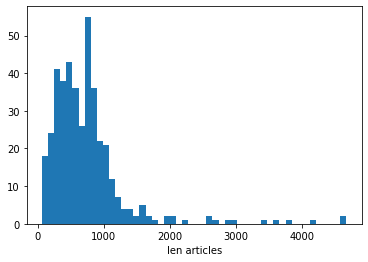

Article length distributon
count     388.000000
mean      623.007732
std       302.358562
min        66.000000
25%       384.750000
50%       599.000000
75%       825.000000
max      1467.000000
Name: text_length, dtype: float64
Histogram lens of articles


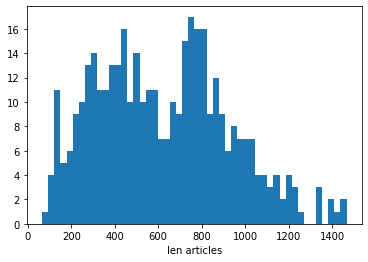


Starting text preprocessing..
413


,text,human_label,text_length,clean_text
0,Buenos Aires Playa is an urban beach on the Rí...,0,408,"[buenos, aire, playa, urban, beach, ro, de, la..."
2,Contributed by Robert Lyman © 2017The United ...,1,1591,"[contribute, robert, lyman, unite, kingdom, fi..."
3,Share this...FacebookTwitterState parliamentar...,1,598,"[thisfacebooktwitterstate, parliamentarian, wo..."
5,"On April 7, I wrote about global warming “hoth...",0,666,"[april, write, global, warm, hothead, dominate..."
6,From PragerU\nHas environmentalism become more...,2,124,"[prageru, environmentalism, become, good, fait..."


In [2]:
path = '../labelled_data/labelled_data.csv'

print("Importing data...")
df = import_data(path)

print("\nDropping na values..")
df = na_values(df)

print("\nEncoding classes..")
df = class_encoding(df)

print("\nFiltering long doocuments and exploring length..")
documents_len_exploration_and_filter(df,max_len=1500)

print("\nStarting text preprocessing..")
clean_text = preprocessing(df)

df['clean_text'] = clean_text

print(len(df))
df.head()

### Split data

In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

print("Training shape ", train_df.shape)
print("Test shape ", test_df.shape)

print("Training target distributions ")
print(train_df['human_label'].value_counts())
print("Test target distributions ")
print(test_df['human_label'].value_counts())

Training shape  (330, 4)
Test shape  (83, 4)
Training target distributions 
0    140
2    116
1     74
Name: human_label, dtype: int64
Test target distributions 
0    31
1    27
2    25
Name: human_label, dtype: int64


### Generate & Save Embeddings

##### Word2Vec

In [26]:
w2v_model = Word2VecVectorizerClass()
w2v_model.fit(None) # Just loads already trained Word2Vec model, no fitting

word2vec_embedded_train_df = w2v_model.run(train_df,label_column='human_label')
w2v_model.print_debug_info()
word2vec_embedded_test_df = w2v_model.run(test_df,label_column='human_label')
w2v_model.print_debug_info()

print(word2vec_embedded_train_df.shape)
print(word2vec_embedded_test_df.shape)

words not found  6371
words found  128170
% of words not found  4.735359481496347
words not found  1502
words found  35412
% of words not found  4.068916942081595
(330, 301)
(83, 301)


In [27]:
word2vec_embedded_train_df.to_csv('../labelled_data/embedded_data/word2vec/train.csv')
word2vec_embedded_test_df.to_csv('../labelled_data/embedded_data/word2vec/test.csv')

#### NormBow

In [6]:
normbow = NormBowVectrizerClass()
normbow.fit(df)
normbow.save(pickle_path="./saved_vectorizers/NormBow_vectorizer.pkl")

normbow_embedded_train_df = normbow.run(train_df,label_column='human_label')
normbow_embedded_test_df = normbow.run(test_df,label_column='human_label')


print(word2vec_embedded_train_df.shape)
print(word2vec_embedded_test_df.shape)

label_column: human_label


,aaah,aaasrelevant,ab,abandon,abandonment,abatement,abba,abbasid,abbildung,abbott,...,zooxanthellae,zostera,zu,zuidhoff,zumbota,zur,zurich,zusatzsubstanzen,zwally,human_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
normbow.print_debug_info()

Vocab length: 15676


In [ ]:
normbow_embedded_train_df.to_csv('../labelled_data/embedded_data/normbow/train.csv')
normbow_embedded_test_df.to_csv('../labelled_data/embedded_data/normbow/test.csv')

#### TfIdfVectrizer

In [3]:
tfidf = TfIdfVectrizerClass()
tfidf.fit(df)
tfidf.save(pickle_path="./saved_vectorizers/TfIdf_vectorizer.pkl")
tfidf.run(df,label_column='human_label')

,abandon,abet,ability,able,abortion,abroad,absence,absent,absolute,absolutely,...,youll,young,youre,youth,youve,yr,zealand,zero,zone,human_label
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,0.0,0.0,0.0,0.017074,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
409,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.045131,0.0,0.0,2
410,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
411,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [5]:
tfidf.print_debug_info()

Vocab length: 3598
